In [21]:
pip install pytrends matplotlib pandas seaborn plotly

In [22]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from pytrends.request import TrendReq

In [23]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


# Setup pytrends library & Keyword Define 

In [24]:
from pytrends.request import TrendReq

# Now you can use TrendReq
pytrends = TrendReq(hl="en-US", tz=360)
keyword = "cloud computing"

# Data Request

In [25]:
pytrends.build_payload([keyword], cat=0, timeframe="today 12-m", geo="", gprop="")

# Now lets Check Country Wise Data 

In [26]:
region_data = pytrends.interest_by_region()
region_data =region_data.sort_values(by = keyword,ascending = False).head(15)

C:\Users\Haroon Traders\AppData\Local\Temp\ipykernel_23292\865488110.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




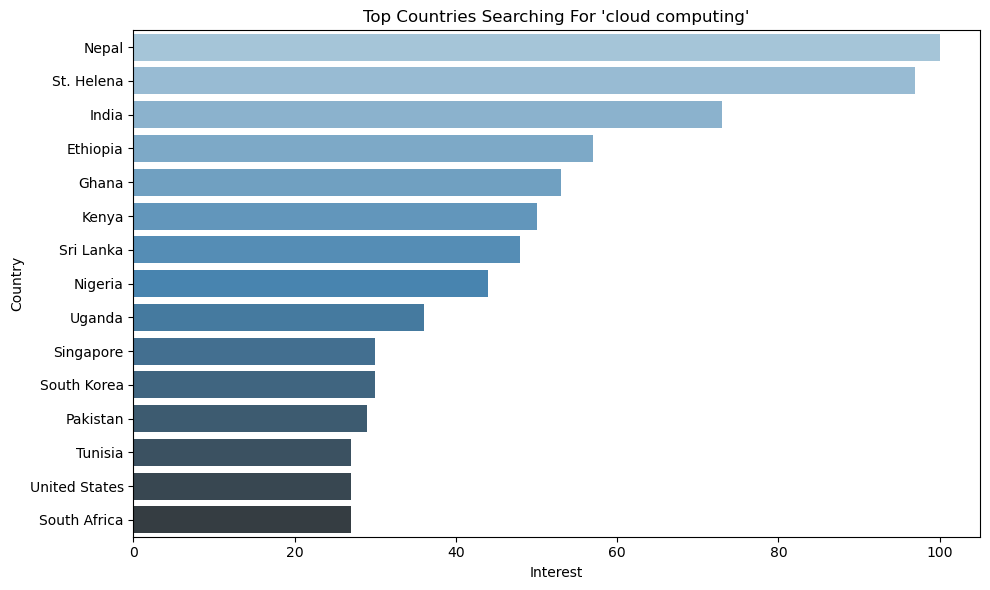

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(data=region_data, x=keyword, y=region_data.index, palette="Blues_d", legend=False)
plt.title(f"Top Countries Searching For '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Now we will create World Map

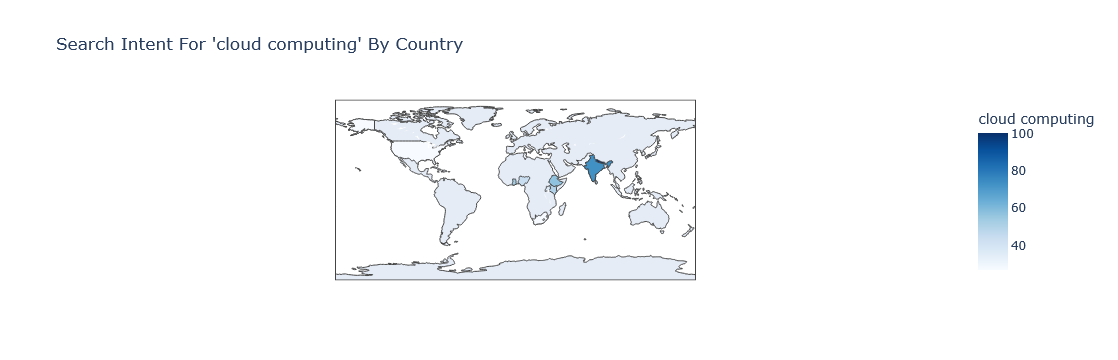

In [28]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations="geoName",
                    locationmode="country names",  # Fixed: changed to plural
                    color=keyword,
                    title=f"Search Intent For '{keyword}' By Country",
                    color_continuous_scale="Blues")
fig.show()

# Now We Will Check Time Wise Interest 

In [30]:
time_df = pytrends.interest_over_time()
print(time_df.head())

            cloud computing  isPartial
date                                  
2024-11-24               43      False
2024-12-01               47      False
2024-12-08               41      False
2024-12-15               34      False
2024-12-22               31      False


C:\Users\Haroon Traders\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



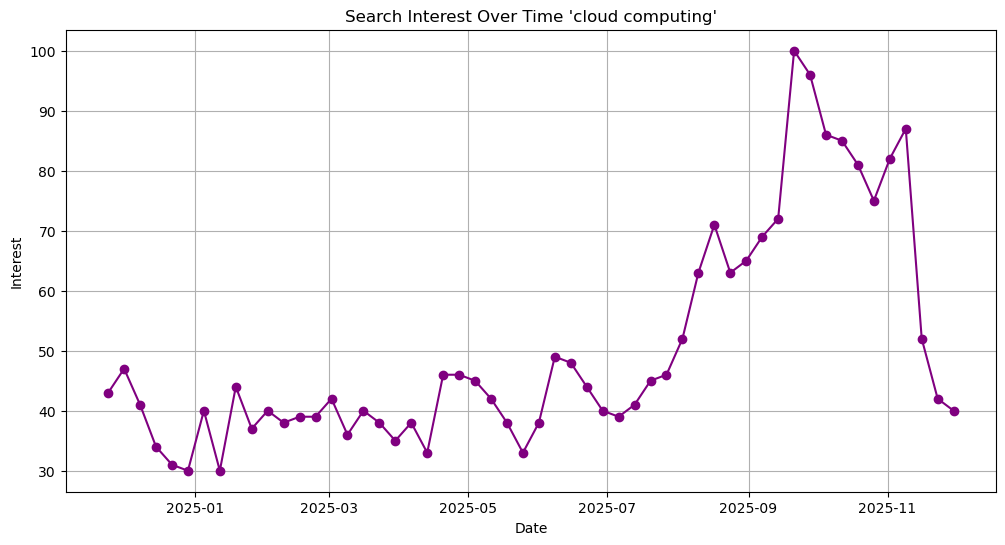

In [35]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker="o", color="purple")  # Changed "0" to "o"
plt.title(f"Search Interest Over Time '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# Multiple Keyword Comparision

In [39]:
kw_list = ["cloud computing", "Data Science", "Machine Learning"]
pytrends.build_payload(kw_list, cat = 0, timeframe = "today 12-m" , geo ="", gprop = "")

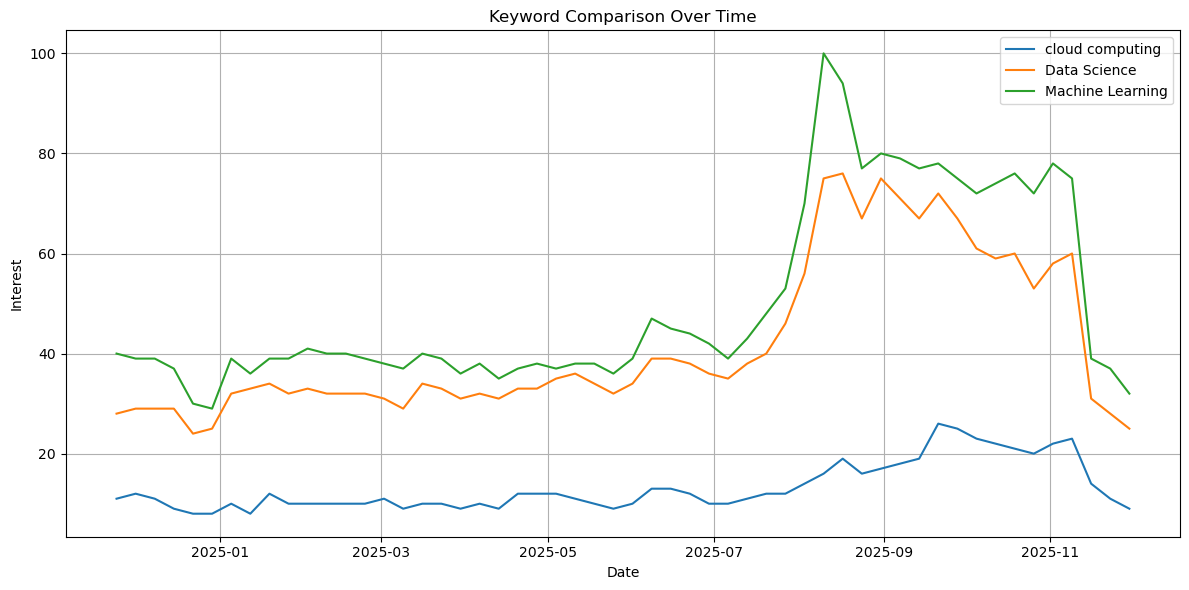

In [42]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Your existing code
compare_df = pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label=kw)

plt.title("Keyword Comparison Over Time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()